<a href="https://colab.research.google.com/github/aakashpaul-2/Machine-Learning-Projects/blob/main/ON_OFF_energy_classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Q3-data.csv to Q3-data.csv


In [ ]:
df = pd.read_csv("Q3-data.csv")


# Split data set: House 1
df_house_1 = df.loc[df["House"] == 1]
           
df_house_1.loc[df_house_1["TV"]  > 15, "ON/OFF"] = 1
df_house_1.loc[df_house_1["TV"]  <= 15, "ON/OFF"] = 0

X_h1 = df_house_1.iloc[:,[1,3]]
y_h1 = (df_house_1.iloc[:,2])

# Split data set: House 2

df_house_2 = df.loc[df["House"] == 2]
df_house_2.loc[df_house_2["TV"]  > 30, "ON/OFF"] = 1
df_house_2.loc[df_house_2["TV"]  <= 30, "ON/OFF"] = 0

X_h2 = df_house_2.iloc[:,[1,3]]
y_h2 = (df_house_2.iloc[:,2])

# Split data set: House 3

df_house_3 = df.loc[df["House"] == 3]
df_house_3.loc[df_house_3["TV"]  > 30, "ON/OFF"] = 1
df_house_3.loc[df_house_3["TV"]  <= 30, "ON/OFF"] = 0

X_h3 = df_house_3.iloc[:,[1,3]]
y_h3 = df_house_3.iloc[:,2]



# Data for Training Set
X_train = pd.concat([X_h1,X_h3])
X_train = X_train.values
y_train = pd.concat([y_h1, y_h3])
y_train = y_train.values.astype(np.float64)

# Test Set
X_test = X_h2.values
y_test = y_h2.values.astype(np.float64)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
scy = MinMaxScaler(feature_range = (0,1))
y_train = scy.fit_transform(X = (y_train).reshape(-1,1))
X_train = sc.fit_transform(X = X_train)
X_test = sc.fit_transform(X = X_test)

X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras 

#Initialising the neurons
regressor = Sequential()

#add lstm
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1), 
                   recurrent_dropout = 0.2))
#regressor.add(Dropout(0.1))
#add lstm layer 2
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.25))
#add lstm layer 3
regressor.add(LSTM(units = 100, return_sequences = True, recurrent_dropout = 0.2))
regressor.add(Dropout(0.25))
#add lstm layer 4
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

#final (output) layer
regressor.add(Dense(units = 1))

optimizer = keras.optimizers.Adam(lr=0.0005)
#compiling RNN
regressor.compile(optimizer = optimizer, loss = "mean_squared_error")

#fitting regressor to model
regressor.fit(X_train, y_train, epochs = 500, batch_size = 10, validation_split=0.2)

Train on 2304 samples, validate on 576 samples
Epoch 1/500
2304/2304 [==============================] - 9s 4ms/step - loss: 0.0414 - val_loss: 0.1469
Epoch 2/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0403 - val_loss: 0.1415
Epoch 3/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0399 - val_loss: 0.1517
Epoch 4/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0401 - val_loss: 0.1566
Epoch 5/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0394 - val_loss: 0.1296
Epoch 6/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0376 - val_loss: 0.1462
Epoch 7/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0345 - val_loss: 0.1451
Epoch 8/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0314 - val_loss: 0.2305
Epoch 9/500
2304/2304 [==============================] - 6s 3ms/step - loss: 0.0297 - val_loss: 0.1877
Epoch 10/500
2304/2304 [==

In [ ]:
y_pred_test = regressor.predict(X_test)

y_pred_test = scy.inverse_transform(y_pred_test)

y_pred_test_1 = y_pred_test > 45
y_test_1 = y_test > 45


In [ ]:
from sklearn.metrics import confusion_matrix

cm_rnn_test_h3_n = confusion_matrix( y_pred_test_1,y_test_1)

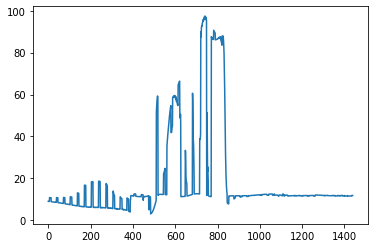

In [ ]:
plt.plot(y_pred_test)